# Breast Cancer Classification

##  Importing Packages

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')

## Load the data

In [ ]:
!wget https://www2.macs.hw.ac.uk/~js2001/data.csv --no-check-certificate

--2022-11-03 11:15:10--  https://www2.macs.hw.ac.uk/~js2001/data.csv
Resolving www2.macs.hw.ac.uk (www2.macs.hw.ac.uk)... 137.195.15.99
Connecting to www2.macs.hw.ac.uk (www2.macs.hw.ac.uk)|137.195.15.99|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 125204 (122K) [text/csv]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>] 122.27K   259KB/s    in 0.5s    

2022-11-03 11:15:11 (259 KB/s) - ‘data.csv.1’ saved [125204/125204]



In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preprocessing

In [ ]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [ ]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### There are no missing values in the data.

## Remove some data 

we can see that there are many columns which are very highly correlated which causes multicollinearity so we have to remove highly correlated features.

In [ ]:
# removing highly correlated features

corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 23 columns.


In [ ]:
# creating features and label 

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [ ]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# best parameters

grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 21,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'splitter': 'random'}

In [ ]:
# best score

grid_search_dt.best_score_

0.9574050632911393

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=8,
                       splitter='random')

In [ ]:
y_pred = dtc.predict(X_test)

[Text(0.6847826086956522, 0.9615384615384616, 'X[15] <= 0.02\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.45652173913043476, 0.8846153846153846, 'X[3] <= -0.077\nentropy = 0.509\nsamples = 274\nvalue = [243, 31]'),
 Text(0.34782608695652173, 0.8076923076923077, 'X[7] <= 0.65\nentropy = 0.154\nsamples = 225\nvalue = [220, 5]'),
 Text(0.30434782608695654, 0.7307692307692307, 'X[17] <= 1.284\nentropy = 0.129\nsamples = 224\nvalue = [220, 4]'),
 Text(0.2608695652173913, 0.6538461538461539, 'X[21] <= 0.066\nentropy = 0.103\nsamples = 223\nvalue = [220, 3]'),
 Text(0.21739130434782608, 0.5769230769230769, 'X[7] <= 0.043\nentropy = 0.129\nsamples = 168\nvalue = [165, 3]'),
 Text(0.17391304347826086, 0.5, 'X[12] <= -0.344\nentropy = 0.095\nsamples = 165\nvalue = [163, 2]'),
 Text(0.13043478260869565, 0.4230769230769231, 'X[5] <= -0.283\nentropy = 0.191\nsamples = 68\nvalue = [66, 2]'),
 Text(0.08695652173913043, 0.34615384615384615, 'X[18] <= -0.52\nentropy = 0.239\nsamples =

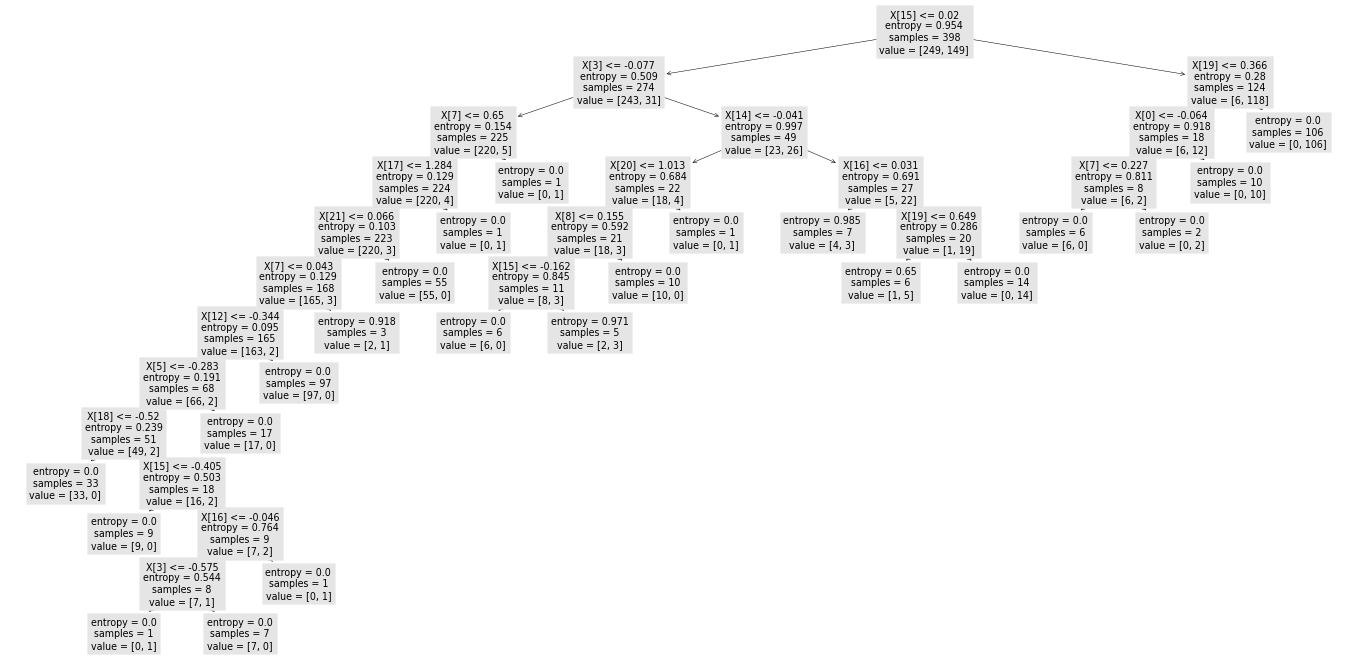

In [ ]:
from sklearn import tree
plt.figure(figsize=(24,12))
tree.plot_tree(dtc.fit(X_train, y_train))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# accuracy score

print(accuracy_score(y_train, dtc.predict(X_train)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

0.9874371859296482
0.935672514619883


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[102   6]
 [  5  58]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred)) #what is the support???

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       108
           1       0.91      0.92      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



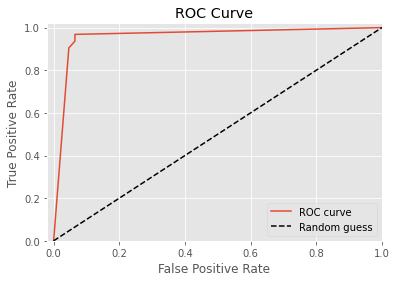

In [ ]:
from sklearn.metrics import roc_curve
%matplotlib inline
y_pred_prob = dtc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob)

0.9583333333333334

## The Best Tree (optional)

In [ ]:
new = DecisionTreeClassifier()

parameters_best = {
    # 'criterion' : ['gini', 'entropy'],
    # 'max_depth' : range(2, 32, 1),
    # 'min_samples_leaf' : range(1, 10, 1),
    # 'min_samples_split' : range(2, 10, 1),
    # 'splitter' : ['best', 'random']
    # best parameters
    'criterion': ['gini'],
    'max_depth': [21],
    'min_samples_leaf': [3],
    'min_samples_split': [7],
    'splitter': ['random']
}

new_dt = GridSearchCV(new, parameters_best, cv = 5, n_jobs = -1, verbose = 1)
new_dt.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [21],
                         'min_samples_leaf': [3], 'min_samples_split': [7],
                         'splitter': ['random']},
             verbose=1)

In [ ]:
new_dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 35, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')

In [ ]:
new_pred = new_dt.predict(X_test)

[Text(0.6203703703703703, 0.9444444444444444, 'X[15] <= 1.041\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.5833333333333334, 0.8333333333333334, 'X[15] <= -0.191\ngini = 0.386\nsamples = 337\nvalue = [249, 88]'),
 Text(0.3148148148148148, 0.7222222222222222, 'X[19] <= 0.204\ngini = 0.131\nsamples = 242\nvalue = [225, 17]'),
 Text(0.2222222222222222, 0.6111111111111112, 'X[7] <= 0.69\ngini = 0.027\nsamples = 217\nvalue = [214, 3]'),
 Text(0.18518518518518517, 0.5, 'X[17] <= -0.634\ngini = 0.018\nsamples = 215\nvalue = [213, 2]'),
 Text(0.14814814814814814, 0.3888888888888889, 'X[19] <= -0.486\ngini = 0.041\nsamples = 96\nvalue = [94, 2]'),
 Text(0.07407407407407407, 0.2777777777777778, 'X[7] <= -0.233\ngini = 0.023\nsamples = 87\nvalue = [86, 1]'),
 Text(0.037037037037037035, 0.16666666666666666, 'gini = 0.0\nsamples = 75\nvalue = [75, 0]'),
 Text(0.1111111111111111, 0.16666666666666666, 'X[11] <= 0.433\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.0740740740740

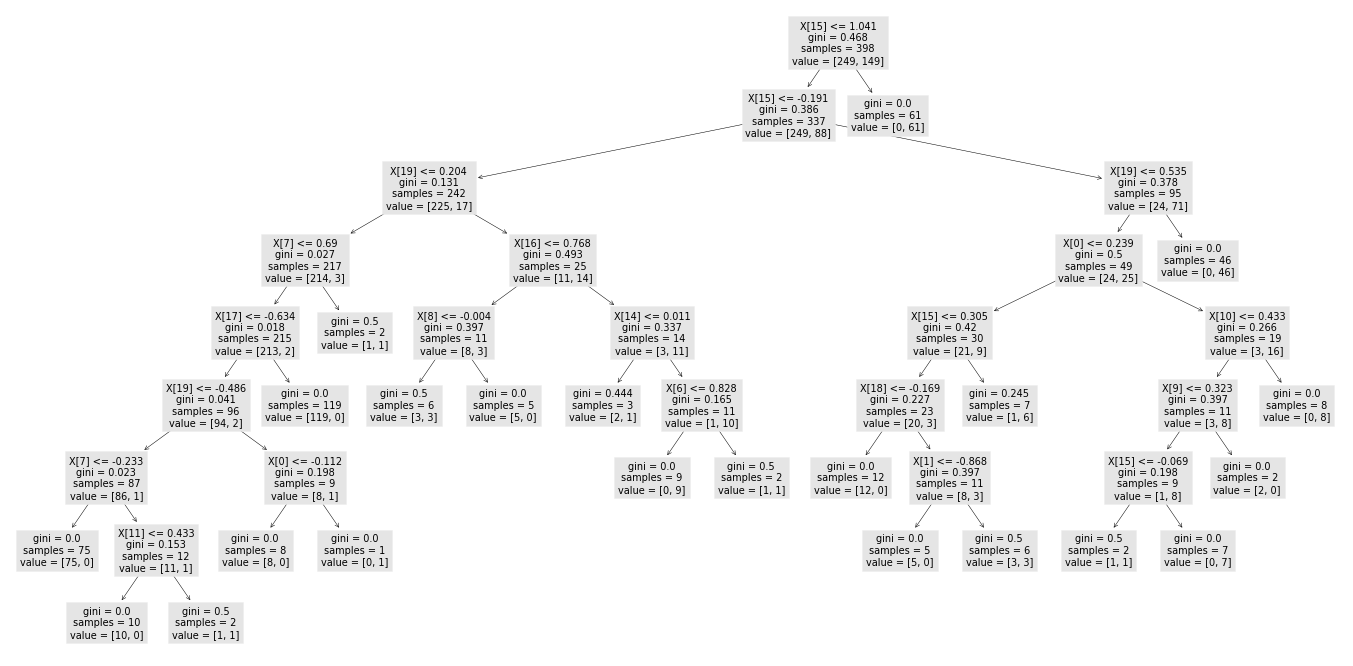

In [ ]:
plt.figure(figsize=(24,12))
tree.plot_tree(new_dtc.fit(X_train, y_train))

In [ ]:
print(accuracy_score(y_train, new_dtc.predict(X_train)))

new_dtc_acc = accuracy_score(y_test, new_dtc.predict(X_test))
print(new_dtc_acc)

0.9698492462311558
0.9590643274853801


In [ ]:
print(confusion_matrix(y_test, new_pred))

[[97 11]
 [ 4 59]]


In [ ]:
print(classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       108
           1       0.84      0.94      0.89        63

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



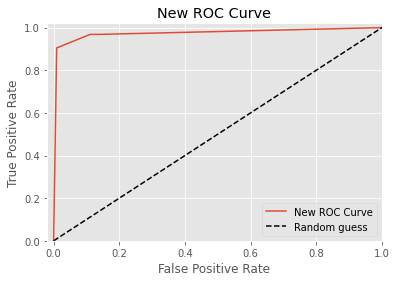

In [ ]:
%matplotlib inline
new_y_pred_prob = new_dtc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, new_y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='New ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('New ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [ ]:
roc_auc_score(y_test, new_y_pred_prob)

0.9739124044679601